In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def permeability(slope):
    return (162.6 * 800 * 1.27 * 0.1) / (slope * 30)

with open('nametag.txt', 'r') as file:
    data_nametag = file.read()
    
time_array = pd.read_csv("clean_" + data_nametag + ".csv", index_col=0)["Time(s)"].to_numpy()
clean = pd.read_csv("clean_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
lowess_outliers = pd.read_csv("lowess_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
lowess_noisy = pd.read_csv("lowess_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
poly_outliers = pd.read_csv("poly_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
poly_noisy = pd.read_csv("poly_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
spl_outliers = pd.read_csv("spl_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
spl_noisy = pd.read_csv("spl_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
wavelet_outliers = pd.read_csv("wavelet_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
wavelet_noisy = pd.read_csv("wavelet_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()

time_array_log = np.log(time_array[999:])

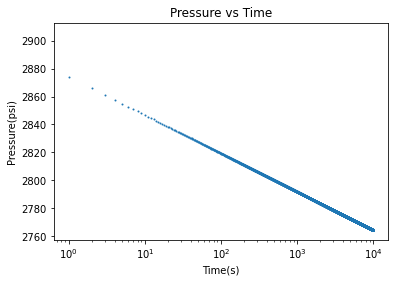

In [3]:
plt.scatter(time_array, clean, 1)
plt.xscale('log')
plt.title("Pressure vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Pressure(psi)")
plt.savefig("clean_logscale_" + data_nametag, dpi=400)

In [4]:
reg_clean = LinearRegression().fit(time_array_log.reshape(-1, 1), clean[999:].reshape(-1, 1))
pred_clean = reg_clean.predict(time_array_log.reshape(-1, 1)).flatten()
slope_clean = pred_clean[0]-pred_clean[-1]
permeability_clean = permeability(slope_clean)
label_clean = 'Clean Data - k=' + str(round(permeability_clean, 3))  + "mD"

reg_lowess_outliers = LinearRegression().fit(time_array_log.reshape(-1, 1), lowess_outliers[999:].reshape(-1, 1))
pred_lowess_outliers = reg_lowess_outliers.predict(time_array_log.reshape(-1, 1)).flatten()
slope_lowess_outliers = pred_lowess_outliers[0]-pred_lowess_outliers[-1]
permeability_lowess_outliers = permeability(slope_lowess_outliers)
label_lowess_outliers = 'LOWESS / Outliers - k=' + str(round(permeability_lowess_outliers, 3))  + "mD"

reg_lowess_noisy = LinearRegression().fit(time_array_log.reshape(-1, 1), lowess_noisy[999:].reshape(-1, 1))
pred_lowess_noisy = reg_lowess_noisy.predict(time_array_log.reshape(-1, 1)).flatten()
slope_lowess_noisy = pred_lowess_noisy[0]-pred_lowess_noisy[-1]
permeability_lowess_noisy = permeability(slope_lowess_noisy)
label_lowess_noisy = 'LOWESS / Noisy - k=' + str(round(permeability_lowess_noisy, 3)) + "mD"

reg_poly_outliers = LinearRegression().fit(time_array_log.reshape(-1, 1), poly_outliers[999:].reshape(-1, 1))
pred_poly_outliers = reg_poly_outliers.predict(time_array_log.reshape(-1, 1)).flatten()
slope_poly_outliers = pred_poly_outliers[0]-pred_poly_outliers[-1]
permeability_poly_outliers = permeability(slope_poly_outliers)
label_poly_outliers = 'Polyfit / Outliers - k=' + str(round(permeability_poly_outliers, 3)) + "mD"

reg_poly_noisy = LinearRegression().fit(time_array_log.reshape(-1, 1), poly_noisy[999:].reshape(-1, 1))
pred_poly_noisy = reg_poly_noisy.predict(time_array_log.reshape(-1, 1)).flatten()
slope_poly_noisy = pred_poly_noisy[0]-pred_poly_noisy[-1]
permeability_poly_noisy = permeability(slope_poly_noisy)
label_poly_noisy = 'Polyfit / Noisy - k=' + str(round(permeability_poly_noisy, 3)) + "mD"

reg_spl_outliers = LinearRegression().fit(time_array_log.reshape(-1, 1), spl_outliers[999:].reshape(-1, 1))
pred_spl_outliers = reg_spl_outliers.predict(time_array_log.reshape(-1, 1)).flatten()
slope_spl_outliers = pred_spl_outliers[0]-pred_spl_outliers[-1]
permeability_spl_outliers = permeability(slope_spl_outliers)
label_spl_outliers = 'Spline / Outliers - k=' + str(round(permeability_spl_outliers, 3)) + "mD"

reg_spl_noisy = LinearRegression().fit(time_array_log.reshape(-1, 1), spl_noisy[999:].reshape(-1, 1))
pred_spl_noisy = reg_spl_noisy.predict(time_array_log.reshape(-1, 1)).flatten()
slope_spl_noisy = pred_spl_noisy[0]-pred_spl_noisy[-1]
permeability_spl_noisy = permeability(slope_spl_noisy)
label_spl_noisy = 'Spline / Noisy - k=' + str(round(permeability_spl_noisy, 3)) + "mD"

reg_wavelet_outliers = LinearRegression().fit(time_array_log.reshape(-1, 1), wavelet_outliers[999:].reshape(-1, 1))
pred_wavelet_outliers = reg_wavelet_outliers.predict(time_array_log.reshape(-1, 1)).flatten()
slope_wavelet_outliers = pred_wavelet_outliers[0]-pred_wavelet_outliers[-1]
permeability_wavelet_outliers = permeability(slope_wavelet_outliers)
label_wavelet_outliers = 'Wavelet / Outliers - k=' + str(round(permeability_wavelet_outliers, 3)) + "mD"

reg_wavelet_noisy = LinearRegression().fit(time_array_log.reshape(-1, 1), wavelet_noisy[999:].reshape(-1, 1))
pred_wavelet_noisy = reg_wavelet_noisy.predict(time_array_log.reshape(-1, 1)).flatten()
slope_wavelet_noisy = pred_wavelet_noisy[0]-pred_wavelet_noisy[-1]
permeability_wavelet_noisy = permeability(slope_wavelet_noisy)
label_wavelet_noisy = 'Wavelet / Noisy - k=' + str(round(permeability_wavelet_noisy, 3)) + "mD"

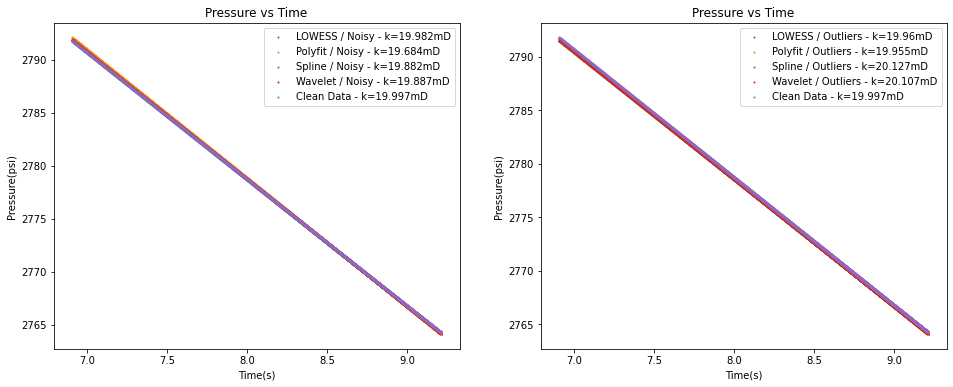

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.set_title("Pressure vs Time")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Pressure(psi)")
ax2.set_title("Pressure vs Time")
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Pressure(psi)")
ax1.scatter(time_array_log, pred_lowess_noisy, s=1, label=label_lowess_noisy)
ax1.scatter(time_array_log, pred_poly_noisy, s=1, label=label_poly_noisy)
ax1.scatter(time_array_log, pred_spl_noisy, s=1, label=label_spl_noisy)
ax1.scatter(time_array_log, pred_wavelet_noisy, s=1, label=label_wavelet_noisy)
ax1.scatter(time_array_log, pred_clean, s=1, label=label_clean)
ax2.scatter(time_array_log, pred_lowess_outliers, s=1, label=label_lowess_outliers)
ax2.scatter(time_array_log, pred_poly_outliers, s=1, label=label_poly_outliers)
ax2.scatter(time_array_log, pred_spl_outliers, s=1, label=label_spl_outliers)
ax2.scatter(time_array_log, pred_wavelet_outliers, s=1, label=label_wavelet_outliers)
ax2.scatter(time_array_log, pred_clean, s=1, label=label_clean)
ax1.legend()
ax2.legend()
fig.savefig("permeabilities_noisy_and_outliers", dpi=400, bbox_inches="tight")